# Using Machine Learning for Time Series Forecasting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Carbon_dioxite.csv', index_col='Date', parse_dates=True)

In [3]:
data.index.freq='YS'

In [4]:
data

,Carbon
Date,
1980-01-01,346.183721
1981-01-01,334.381538
1982-01-01,298.004398
1983-01-01,293.436371
1984-01-01,315.858105
1985-01-01,319.602879
1986-01-01,304.143786
1987-01-01,334.571460
1988-01-01,342.754725


<AxesSubplot:xlabel='Date'>

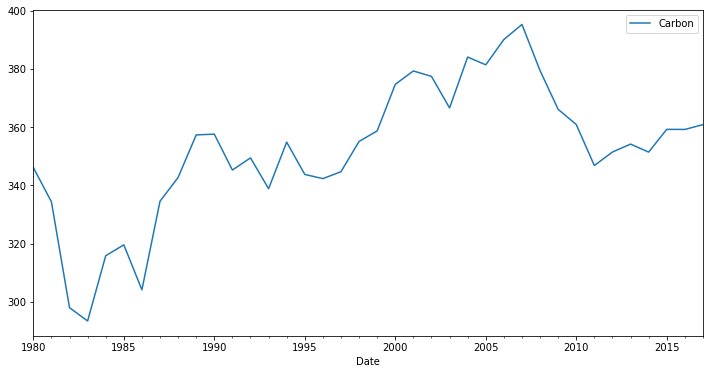

In [5]:
data.plot(figsize=(12,6))

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [7]:
results=seasonal_decompose(data['Carbon'])

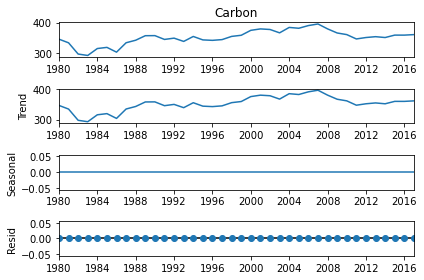

In [8]:
results.plot();

In [9]:
len(data)

38

In [10]:
train=data.iloc[:38]
test=data.iloc[:38]

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [12]:
data.head(), data.tail()

(                Carbon
 Date                  
 1980-01-01  346.183721
 1981-01-01  334.381538
 1982-01-01  298.004398
 1983-01-01  293.436371
 1984-01-01  315.858105,
                 Carbon
 Date                  
 2013-01-01  354.219000
 2014-01-01  351.477053
 2015-01-01  359.290429
 2016-01-01  359.261859
 2017-01-01  360.913489)

In [13]:
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

In [14]:
scaled_train[:10]

array([[0.51761523],
       [0.40179918],
       [0.04482652],
       [0.        ],
       [0.22002681],
       [0.25677466],
       [0.10507298],
       [0.4036629 ],
       [0.48396613],
       [0.62754462]])

In [15]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [16]:
n_input=3
n_features=1
generator=TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [17]:
print(len(scaled_train), len(generator))

38 35


In [18]:
X,y=generator[0]
print(f'Given the array:\n{X.flatten()}')
print(f'predict this  y:\n{y}')

Given the array:
[0.51761523 0.40179918 0.04482652]
predict this  y:
[[0.]]


In [19]:
X.shape

(1, 3, 1)

In [20]:
n_input=12
generator=TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [22]:
model=Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
26/26 [==============================] - 0s 3ms/step - loss: 0.1630
Epoch 2/50
26/26 [==============================] - 0s 3ms/step - loss: 0.0318
Epoch 3/50
26/26 [==============================] - 0s 3ms/step - loss: 0.0235
Epoch 4/50
26/26 [==============================] - 0s 3ms/step - loss: 0.0303
Epoch 5/50
26/26 [==============================] - 0s 3ms/step - loss: 0.0223
Epoch 6/50
26/26 [==============================] - 0s 3ms/step - loss: 0.0197
Epoch 7/50
26/26 [==============================] - 0s 3ms/step - loss: 0.0205
Epoch 8/50
26/26 [==============================] - 0s 3ms/step - loss: 0.0184
Epoch 9/50
26/26 [==============================] - 0s 3ms/step - loss: 0.0182
Epoch 10/50
26/26 [==============================] - 0s 2ms/step - loss: 0.0184
Epoch 11/50
26/26 [==============================] - 0s 3ms/step - loss: 0.0213
Epoch 12/50
26/26 [==============================] - 0s 3ms/step - loss: 0.0222
Epoch 13/50
26/26 [==============================

([<matplotlib.lines.Line2D at 0x207519ced30>],
 [0.16295522451400757,
  0.03180588036775589,
  0.023533664643764496,
  0.030309312045574188,
  0.022334178909659386,
  0.019726496189832687,
  0.020453911274671555,
  0.018431084230542183,
  0.018224550411105156,
  0.018352922052145004,
  0.02129482291638851,
  0.022155126556754112,
  0.017968768253922462,
  0.018126297742128372,
  0.018629148602485657,
  0.016558757051825523,
  0.017324920743703842,
  0.015281504020094872,
  0.016448581591248512,
  0.01575974002480507,
  0.014747253619134426,
  0.01583152823150158,
  0.013800973072648048,
  0.014357119798660278,
  0.01571340300142765,
  0.016478542238473892,
  0.01519088540226221,
  0.01367153599858284,
  0.013649778440594673,
  0.012259130366146564,
  0.012452317401766777,
  0.011965994723141193,
  0.013269172050058842,
  0.014120446518063545,
  0.013695085421204567,
  0.012381142936646938,
  0.01074130367487669,
  0.011791526339948177,
  0.011466077528893948,
  0.011682277545332909,
  

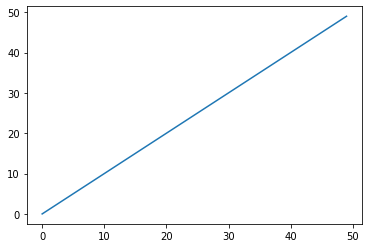

In [24]:
model.fit(generator, epochs=50)
loss_per_epoch=model.history.history['loss']
plt.plot(range(len(loss_per_epoch))), loss_per_epoch

In [25]:
last_train_batch=scaled_train[-12:]

In [26]:
last_train_batch=last_train_batch.reshape(1, n_input, n_features)

In [27]:
model.predict(last_train_batch)

array([[0.6493838]], dtype=float32)

In [28]:
scaled_test[0]

array([0.51761523])

In [29]:
test_predictions=[]
first_eval_batch=scaled_train[-n_input:]
current_batch=first_eval_batch.reshape((1,n_input, n_features))
for i in range(len(test)):
    current_pred=model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

In [30]:
test_predictions

[array([0.6493838], dtype=float32),
 array([0.65690964], dtype=float32),
 array([0.6665936], dtype=float32),
 array([0.6721837], dtype=float32),
 array([0.6756221], dtype=float32),
 array([0.6780823], dtype=float32),
 array([0.67779213], dtype=float32),
 array([0.6766453], dtype=float32),
 array([0.67488706], dtype=float32),
 array([0.67185366], dtype=float32),
 array([0.669618], dtype=float32),
 array([0.66728276], dtype=float32),
 array([0.66535985], dtype=float32),
 array([0.6634887], dtype=float32),
 array([0.6620051], dtype=float32),
 array([0.6609558], dtype=float32),
 array([0.6603286], dtype=float32),
 array([0.6600726], dtype=float32),
 array([0.6601465], dtype=float32),
 array([0.6604616], dtype=float32),
 array([0.660927], dtype=float32),
 array([0.6614843], dtype=float32),
 array([0.66205907], dtype=float32),
 array([0.6626146], dtype=float32),
 array([0.6631106], dtype=float32),
 array([0.66352654], dtype=float32),
 array([0.6638461], dtype=float32),
 array([0.6640659], dt

In [31]:
test.head()

,Carbon
Date,
1980-01-01,346.183721
1981-01-01,334.381538
1982-01-01,298.004398
1983-01-01,293.436371
1984-01-01,315.858105


In [32]:
true_predictions=scaler.inverse_transform(test_predictions)

In [33]:
test['Predictions']=true_predictions

C:\Users\MUVIRI~1\AppData\Local\Temp/ipykernel_18788/2664784394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions']=true_predictions


In [34]:
test['Predictions']

Date
1980-01-01    359.611537
1981-01-01    360.378457
1982-01-01    361.365297
1983-01-01    361.934952
1984-01-01    362.285342
1985-01-01    362.536045
1986-01-01    362.506477
1987-01-01    362.389608
1988-01-01    362.210437
1989-01-01    361.901320
1990-01-01    361.673497
1991-01-01    361.435524
1992-01-01    361.239572
1993-01-01    361.048891
1994-01-01    360.897709
1995-01-01    360.790777
1996-01-01    360.726867
1997-01-01    360.700779
1998-01-01    360.708304
1999-01-01    360.740418
2000-01-01    360.787843
2001-01-01    360.844635
2002-01-01    360.903206
2003-01-01    360.959816
2004-01-01    361.010364
2005-01-01    361.052748
2006-01-01    361.085311
2007-01-01    361.107711
2008-01-01    361.120473
2009-01-01    361.124755
2010-01-01    361.122064
2011-01-01    361.114113
2012-01-01    361.102706
2013-01-01    361.089417
2014-01-01    361.075659
2015-01-01    361.062612
2016-01-01    361.051065
2017-01-01    361.041578
Freq: AS-JAN, Name: Predictions, dtype: float

<AxesSubplot:xlabel='Date'>

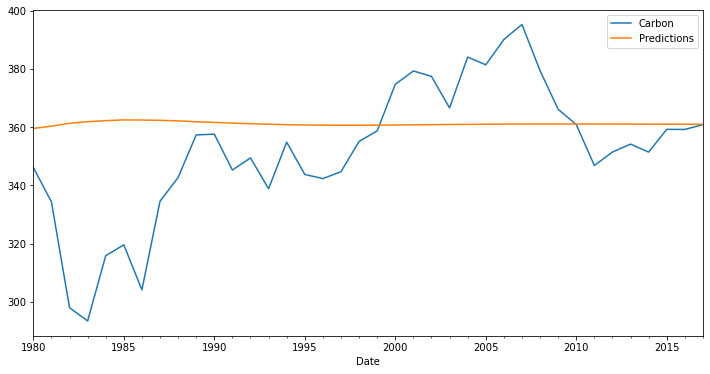

In [35]:
test.plot(figsize=(12,6))

In [36]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Carbon'], test['Predictions']))

In [37]:
print(rmse)

25.452262367914717
